In [1]:
#####load libraries########
from __future__ import print_function
import os, shutil, sys
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import *
from keras import models
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import utils
from keras import preprocessing
print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.2.0
1.9.0


In [2]:
#############parameters##############
nepochs=100
img_row, img_col, img_chn = 150, 150, 3
nbatch_size=32

In [3]:
###########data loading#################
base_dir = 'datas/'
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 500


In [4]:
#############model_first#############
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same',
                        input_shape=(img_row, img_col, img_chn)))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

##########model summary############
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 128)       147584    
__________

In [5]:
########compile##################
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [6]:
############data augmentation#############
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_row, img_col),
        batch_size=nbatch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_row, img_col),
        batch_size=nbatch_size,
        class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [33]:
######### train model#############3
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//nbatch_size,
      epochs=nepochs,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
31/31 [==============================] - 18s 580ms/step - loss: 0.6952 - acc: 0.5302 - val_loss: 0.6835 - val_acc: 0.5178
Epoch 2/100
31/31 [==============================] - 17s 551ms/step - loss: 0.6768 - acc: 0.5778 - val_loss: 0.6525 - val_acc: 0.6415
Epoch 3/100
31/31 [==============================] - 17s 546ms/step - loss: 0.6463 - acc: 0.6349 - val_loss: 0.7081 - val_acc: 0.5159
Epoch 4/100
31/31 [==============================] - 18s 576ms/step - loss: 0.6186 - acc: 0.6474 - val_loss: 0.5847 - val_acc: 0.6751
Epoch 5/100
31/31 [==============================] - 17s 561ms/step - loss: 0.5658 - acc: 0.7044 - val_loss: 0.5592 - val_acc: 0.6992
Epoch 6/100
31/31 [==============================] - 17s 564ms/step - loss: 0.5336 - acc: 0.7306 - val_loss: 0.5099 - val_acc: 0.7703
Epoch 7/100
31/31 [==============================] - 17s 564ms/step - loss: 0.5387 - acc: 0.7317 - val_loss: 0.5184 - val_acc: 0.7278
Epoch 8/100
31/31 [==============================] - 17s 564ms

Epoch 62/100
31/31 [==============================] - 17s 560ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 63/100
31/31 [==============================] - 18s 575ms/step - loss: 0.0419 - acc: 0.9818 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 64/100
31/31 [==============================] - 17s 559ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 65/100
31/31 [==============================] - 17s 555ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 7.3338e-04 - val_acc: 1.0000
Epoch 66/100
31/31 [==============================] - 18s 574ms/step - loss: 0.0375 - acc: 0.9899 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 67/100
31/31 [==============================] - 17s 552ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 7.6632e-04 - val_acc: 1.0000
Epoch 68/100
31/31 [==============================] - 17s 563ms/step - loss: 7.3972e-04 - acc: 1.0000 - val_loss: 4.4719e-04 - val_acc: 1.0000
Epoch 69/100
31/31 [===================

In [34]:
###########saving#########
model.save('cats_and_dogs_small_1.h5')

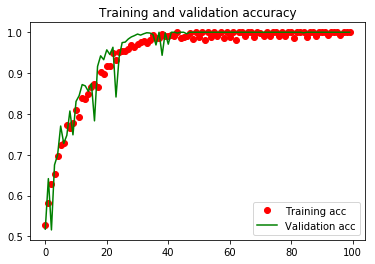

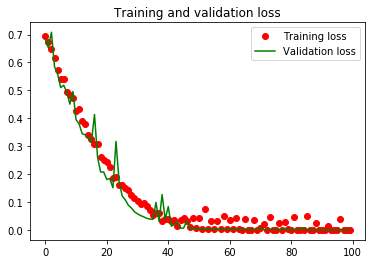

In [36]:
##########olot accurecy##############
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
############CNN  traing with image augmentation##################

In [7]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

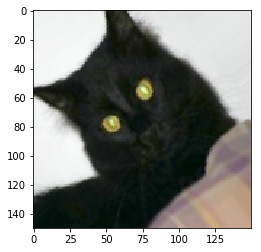

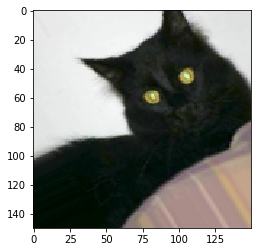

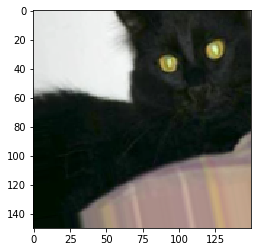

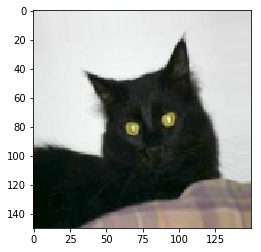

In [8]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(img_row, img_col))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [9]:
############CNN model_2#############
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same',
                        input_shape=(img_row, img_col, img_chn)))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 38, 38, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 128)       147584    
__________

In [10]:
###########data generator#######
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_row, img_col),
        batch_size=nbatch_size,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_row, img_col),
        batch_size=nbatch_size,
        class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
########train##########
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//nbatch_size,
      epochs=nepochs,
      validation_data=validation_generator,
      validation_steps=50)

In [42]:
####model saving################
model.save('cats_and_dogs_small_2.h5')

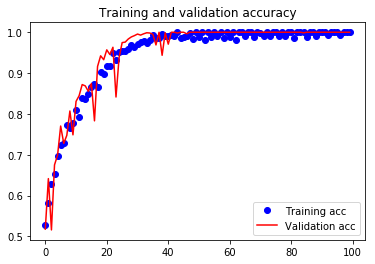

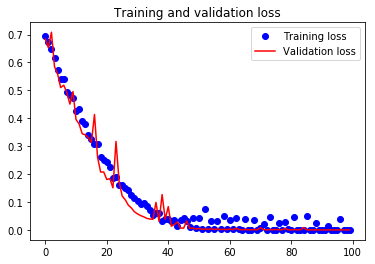

In [43]:
############plot accuracy############
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
#########load model#############
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 38, 38, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 19, 19, 128)       147584    
__________

(1, 150, 150, 3)


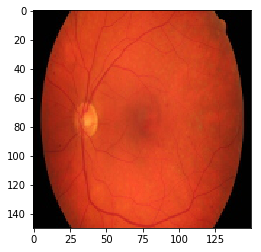

In [19]:
##########loading image############
img_path = 'datas/test/cats/cat.0.jpg'
img = image.load_img(img_path, target_size=(img_row, img_col))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

In [20]:
########layers configuration###########
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

(1, 150, 150, 32)


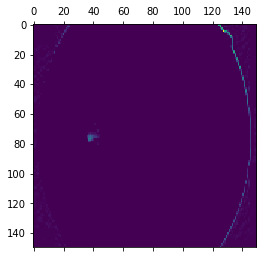

In [21]:
##########plot first layer##########
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

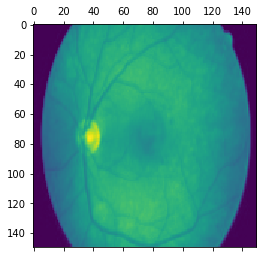

In [22]:
##########plot 2nd layer##########
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


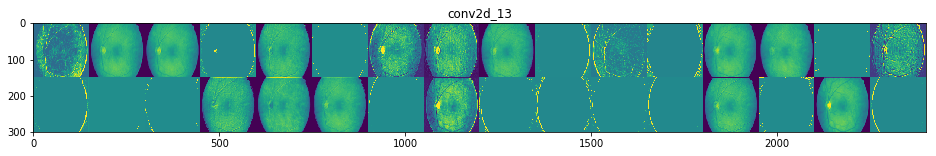

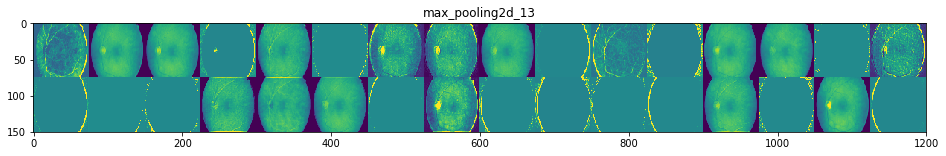

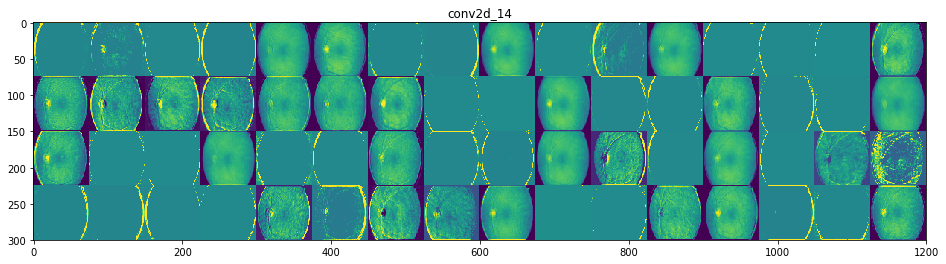

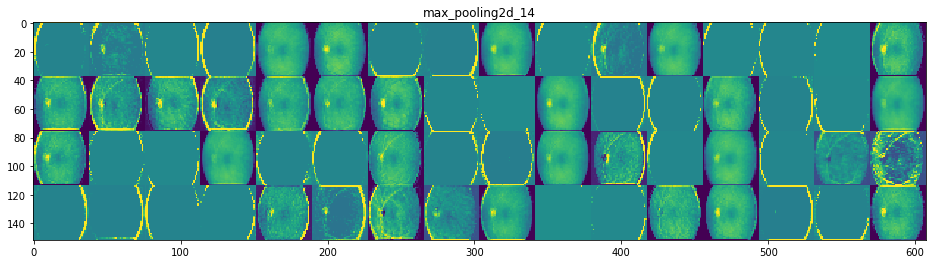

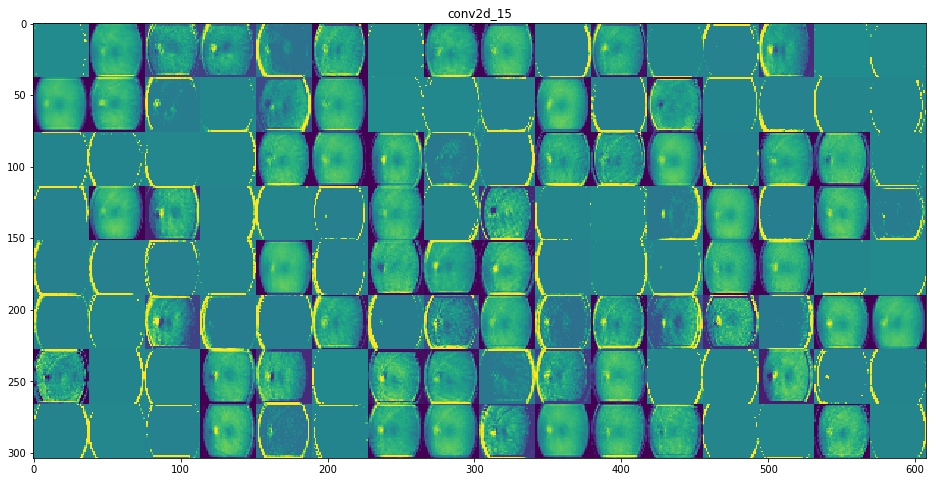

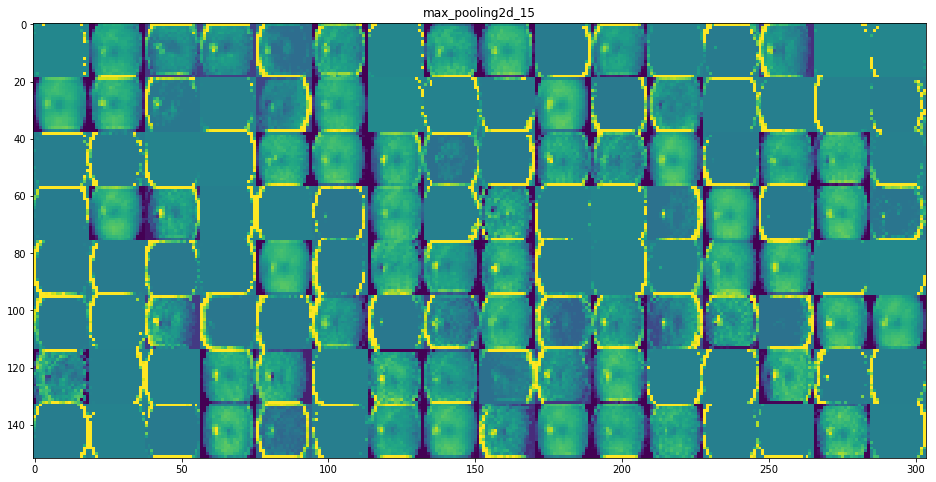

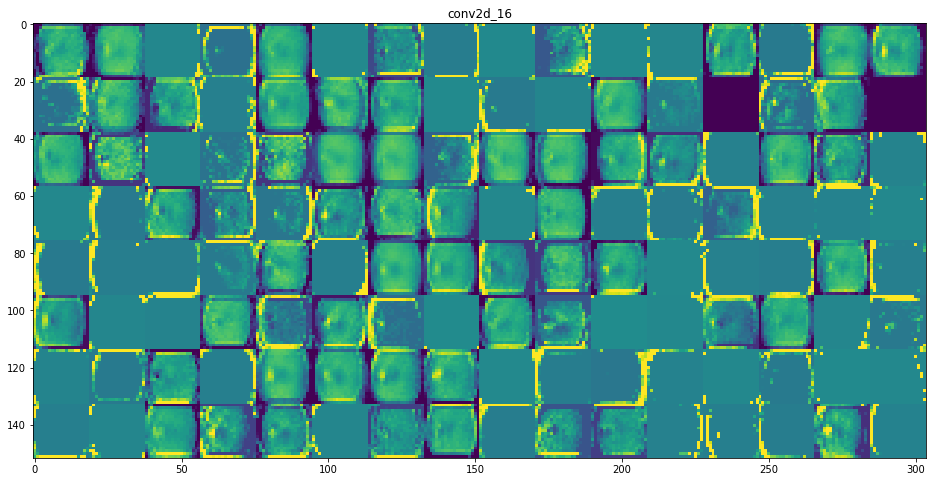

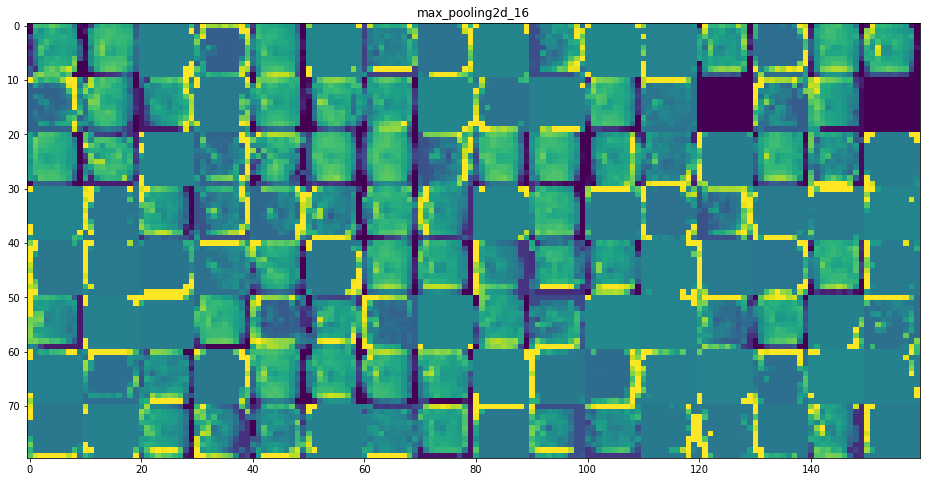

In [23]:
##########plot multiple layer##########
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    # Display under grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')    
plt.show()

In [50]:
#########VGG16################

In [46]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [48]:
grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
iterate = K.function([model.input], [loss, grads])
loss_value, grads_value = iterate([np.zeros((1, img_row, img_col, img_chn))])

In [49]:
input_img_data = np.random.random((1, img_row, img_col, img_chn)) * 20 + 128.
step = 1.  
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [50]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [51]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

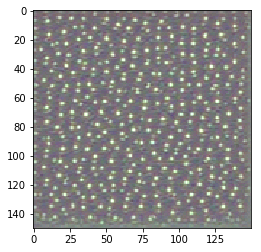

In [52]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


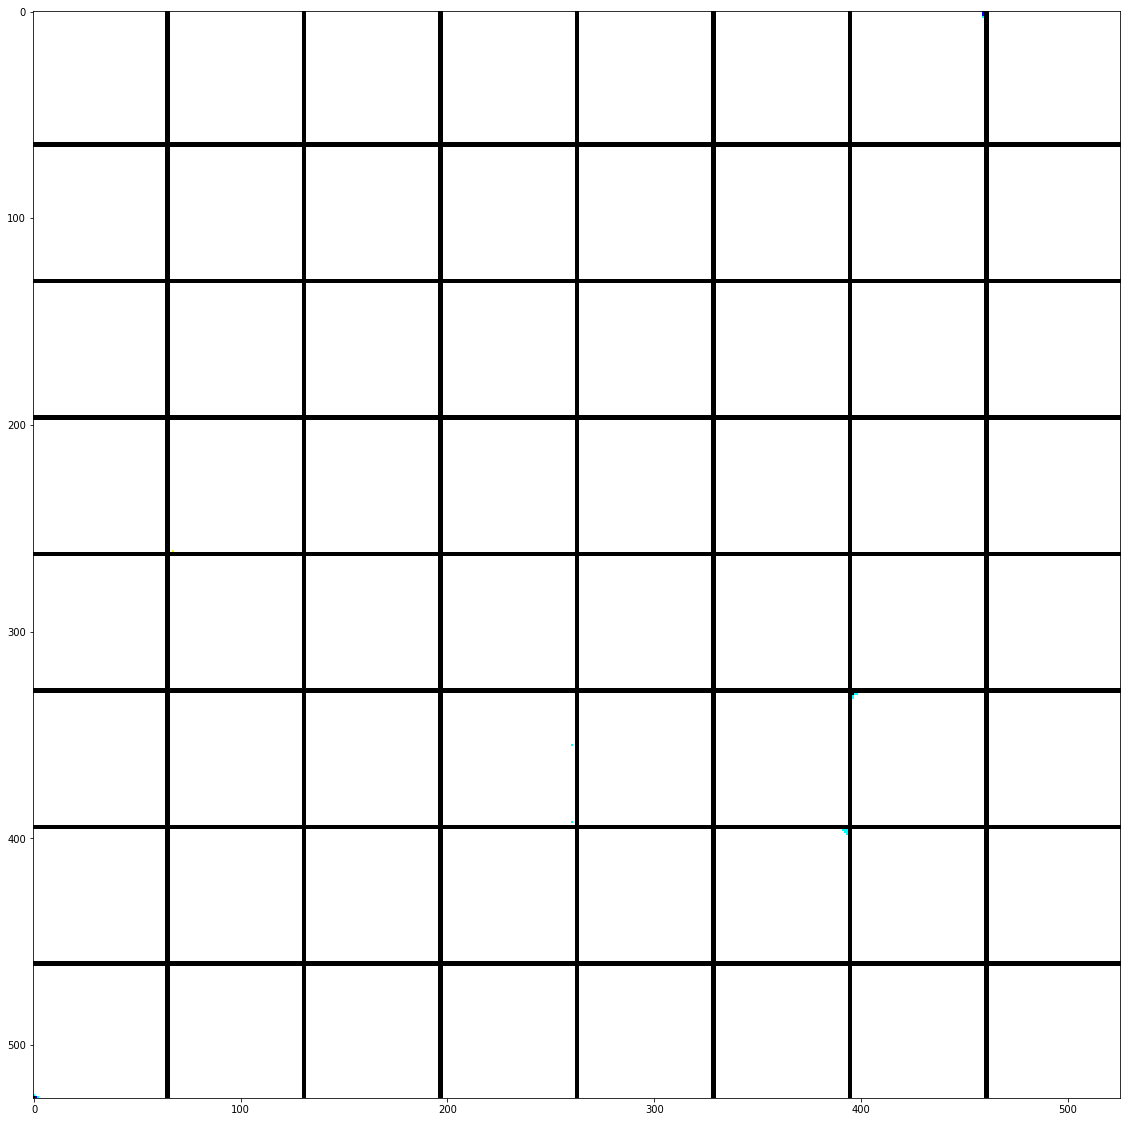

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


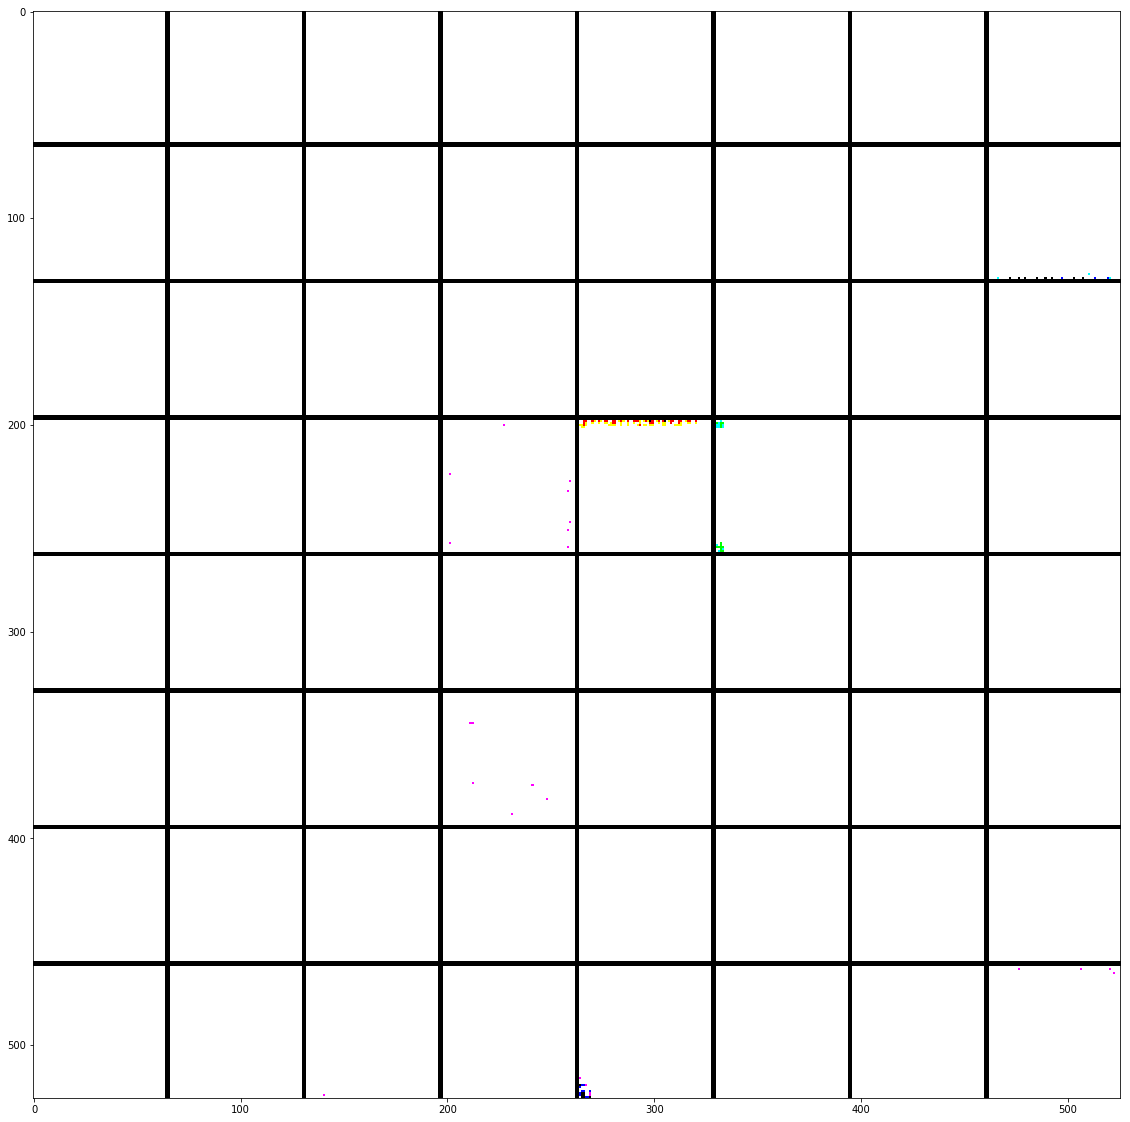

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


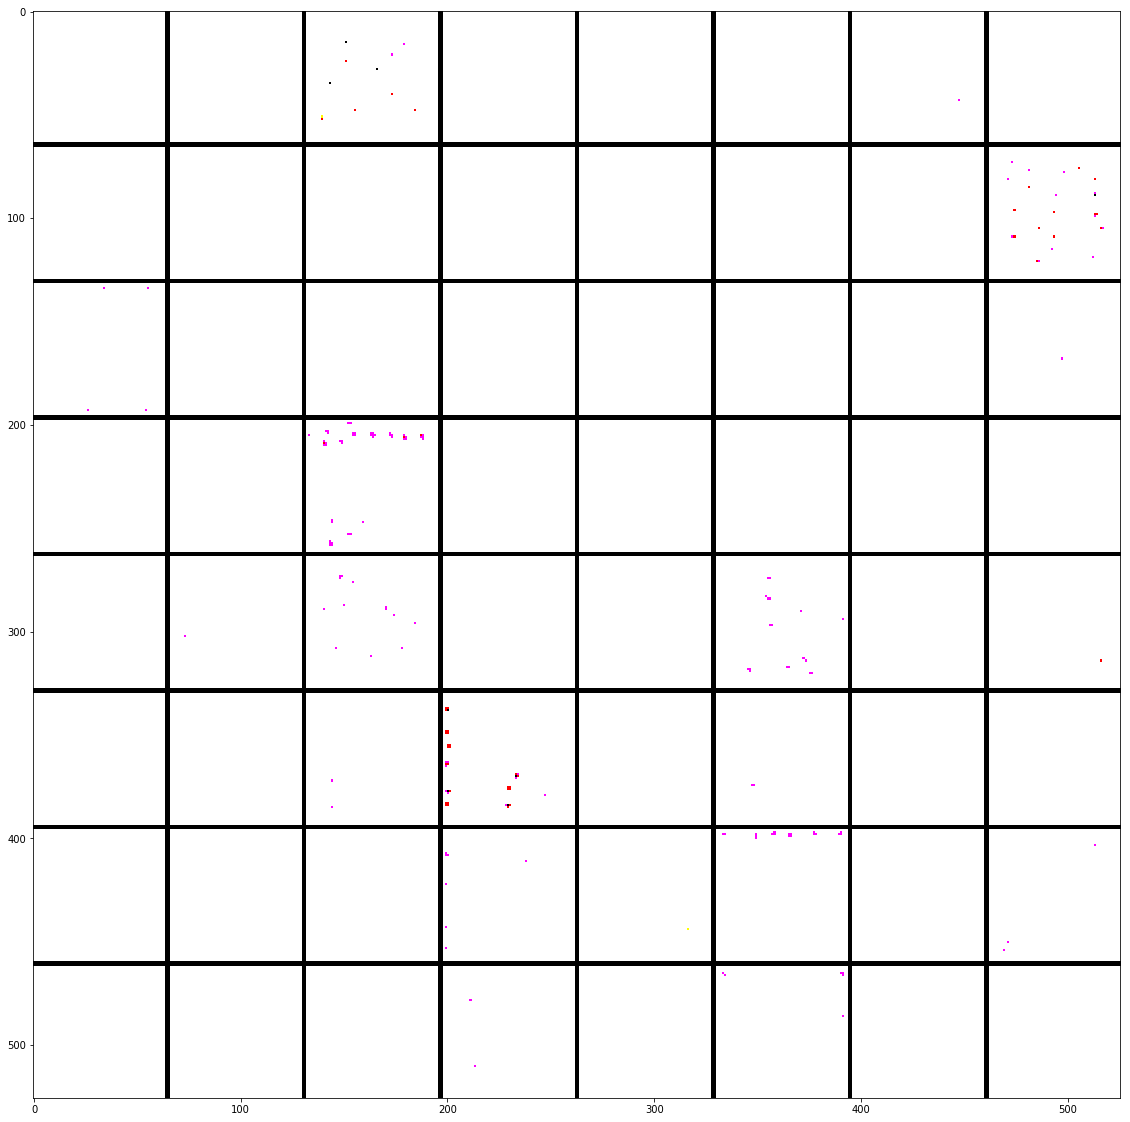

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


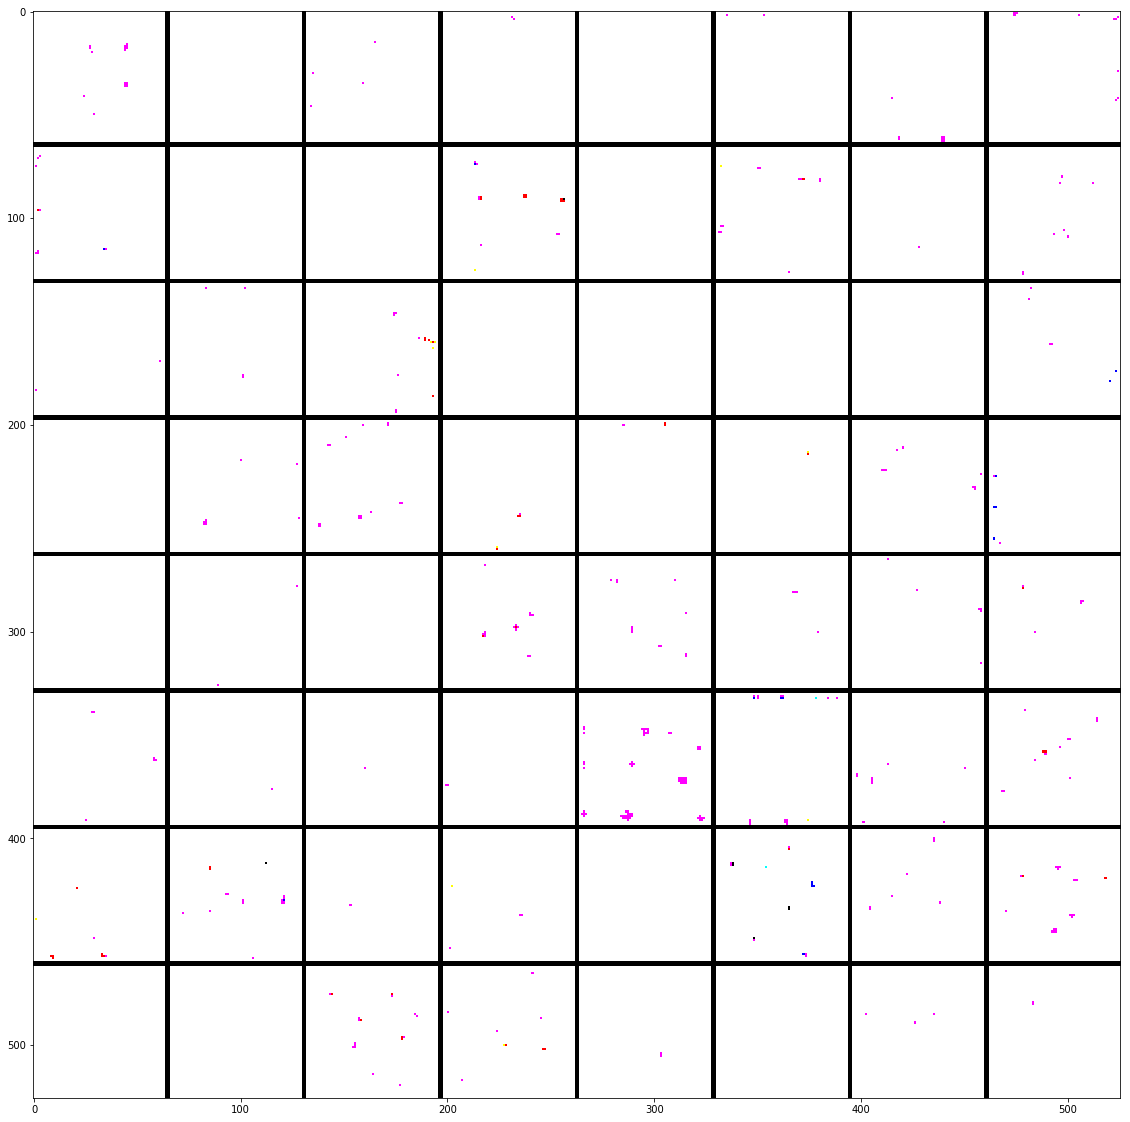

In [54]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 2
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
    for i in range(8): 
        for j in range(8):  
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :]
            
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

In [ ]:
#########end###########